In [1]:
import os
import numpy as np
import mne
import osl
import yaml
from scipy.io import savemat
import matplotlib.pyplot as plt

In [67]:
paths = []
path = '/well/woolrich/projects/disp_csaky/reading_only/ctf/preproc25hz/'

In [68]:
paths.append(path+'sub_rich/oslpy/16253003_reading_single_trial/')
paths[-1] += '16253003_reading_single_trial_preproc_raw.fif'

In [69]:
paths.append(path+'sub_ryan/oslpy/11766_Lukas_20230511_reading-f/')
paths[-1] += '11766_Lukas_20230511_reading-f_preproc_raw.fif'

In [70]:
paths.append(path+'sub_lukas/oslpy/13703054_Lukas_20230511_reading-f/')
paths[-1] += '13703054_Lukas_20230511_reading-f_preproc_raw.fif'

In [107]:
ev_ids = [2, 3, 4, 5, 6]
evokeds = []
epochs = []
for path in paths:
    raw = mne.io.read_raw_fif(path, preload=True)

    ev = mne.events_from_annotations(raw)
    ev = ev[0]

    # epoch
    tmin, tmax = -0.2, 1.0
    epoch = mne.Epochs(raw, ev, ev_ids,
                        tmin=tmin, tmax=tmax,
                        baseline=(None, 0),
                        event_repeated='drop')
    epochs.append(epoch)

    # average
    evoked = epoch.average()
    evokeds.append(evoked)

Opening raw data file /well/woolrich/projects/disp_csaky/reading_only/ctf/preproc25hz/sub_rich/oslpy/16253003_reading_single_trial/16253003_reading_single_trial_preproc_raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 284759 =      0.000 ...  2847.590 secs
Ready.
Current compensation grade : 3
Reading 0 ... 284759  =      0.000 ...  2847.590 secs...
Used Annotations descriptions: ['0', '1', '2', '3', '4', '5', '6', 'Btn1', 'Btn2', 'Btn3', 'Btn4', 'Tr0_1', 'Tr0_2', 'Tr0_3', 'Tr0_4', 'Tr0_5', 'Tr0_6', 'Tr0_7', 'Tr1_1', 'Tr1_2', 'Tr1_3', 'Tr1_4']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1251 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Opening raw data file /well/woolrich/projects/disp_csaky/reading_only/ctf/preproc25hz/sub_ryan/oslpy/11766_Lukas_20230511_reading-f/11766_Lukas_20230511_reading-f_prep

Using data from preloaded Raw for 1235 events and 121 original time points ...
Not setting metadata
1235 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

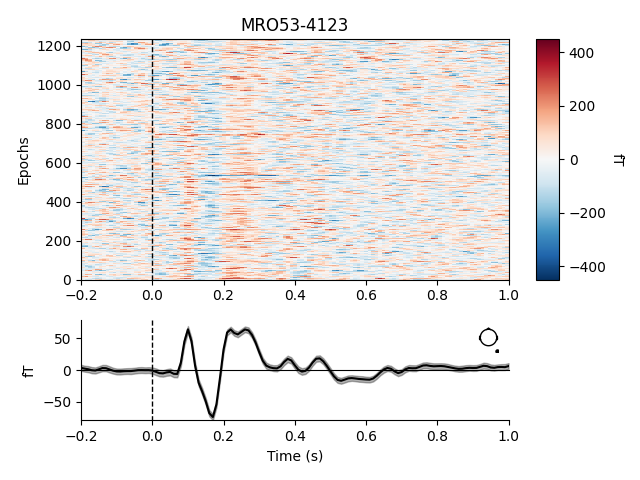

In [109]:
# plot epoch response
epochs[0].plot_image(picks=['MRO53-4123'], show=False)

Using data from preloaded Raw for 1252 events and 121 original time points ...
0 bad epochs dropped
Not setting metadata
1252 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

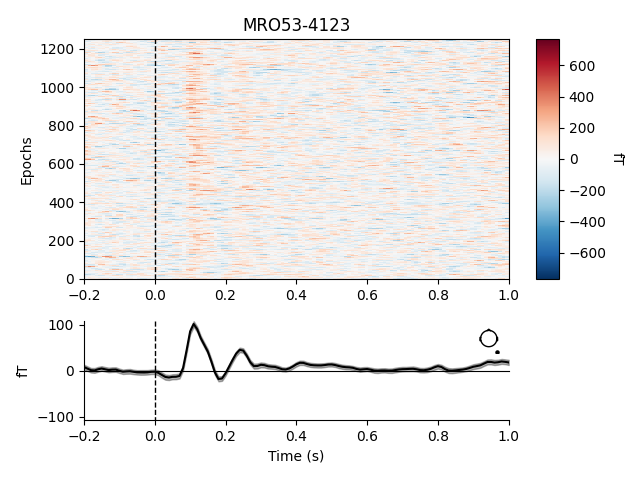

In [110]:
# plot epoch response
epochs[1].plot_image(picks=['MRO53-4123'], show=False)

Using data from preloaded Raw for 1252 events and 121 original time points ...
0 bad epochs dropped
Not setting metadata
1252 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

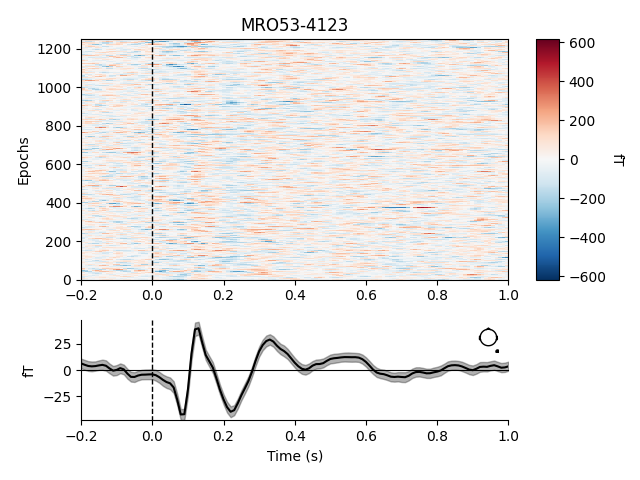

In [112]:
# plot epoch response
epochs[2].plot_image(picks=['MRO53-4123'], show=False)

In [103]:
# keep only the channels present in all datasets
ch_names = evokeds[2].ch_names
for evoked in evokeds:
    ch_names = list(set(ch_names).intersection(evoked.ch_names))
    evoked.pick_channels(ch_names)

In [89]:
evokeds[0]

<Evoked | '0.20 × 2 + 0.20 × 3 + 0.20 × 4 + 0.20 × 5 + 0.20 × 6' (average, N=1235), -0.2 – 1 sec, baseline -0.2 – 0 sec, 352 ch, ~933 kB>

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


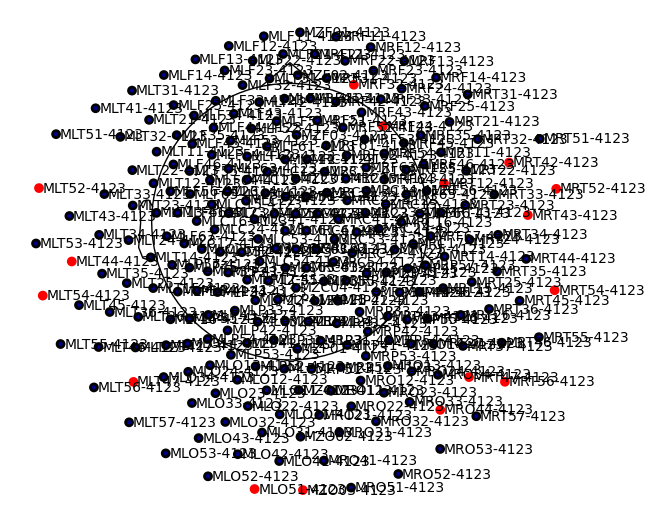

In [81]:
evokeds[0].plot_sensors(show_names=True)
e=0

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


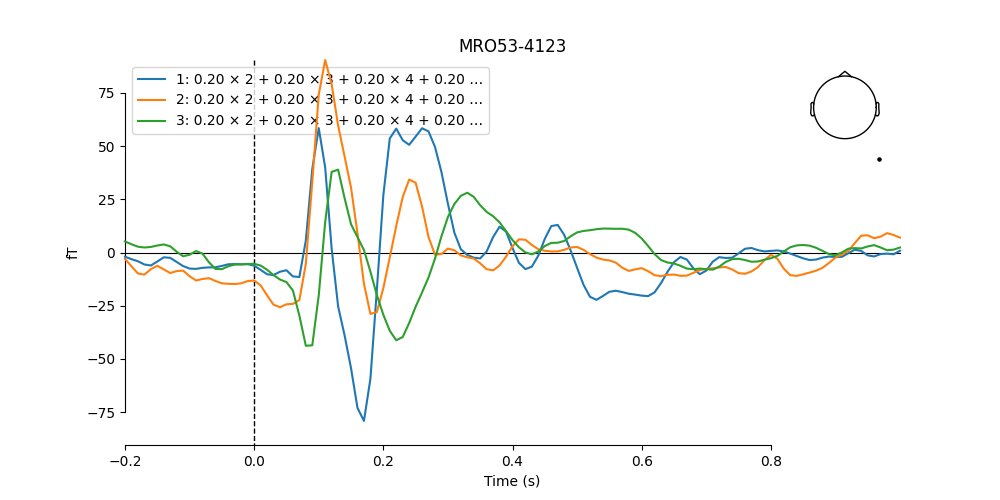

In [104]:
# compare evokeds
%matplotlib widget
fig, ax = plt.subplots(figsize=(10, 5))
mne.viz.plot_compare_evokeds(
    evokeds, picks=['MRO53-4123'], show_sensors='upper right', axes=ax)

# modify legend of plot
ax.legend(['rich', 'ryan', 'lukas'], loc='upper left')

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


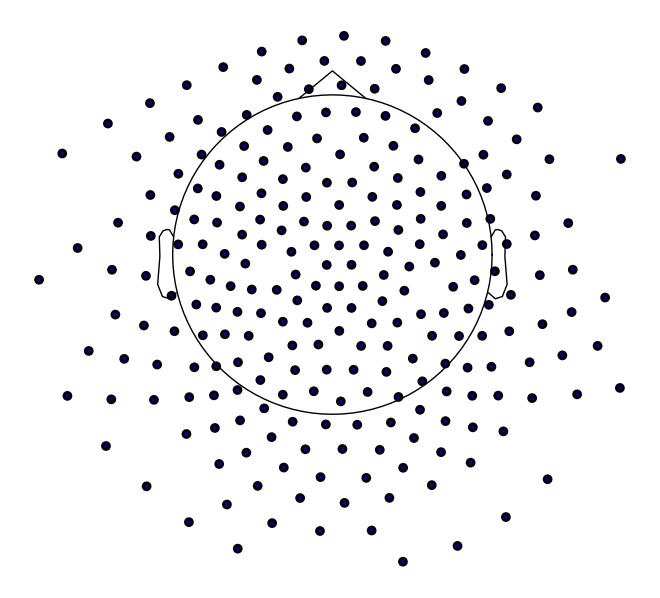

In [53]:
# show position of bad channels (raw.info['bads'])
raw = raw.drop_channels(raw.info['bads'])
raw.plot_sensors(show_names=False)
e=0

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


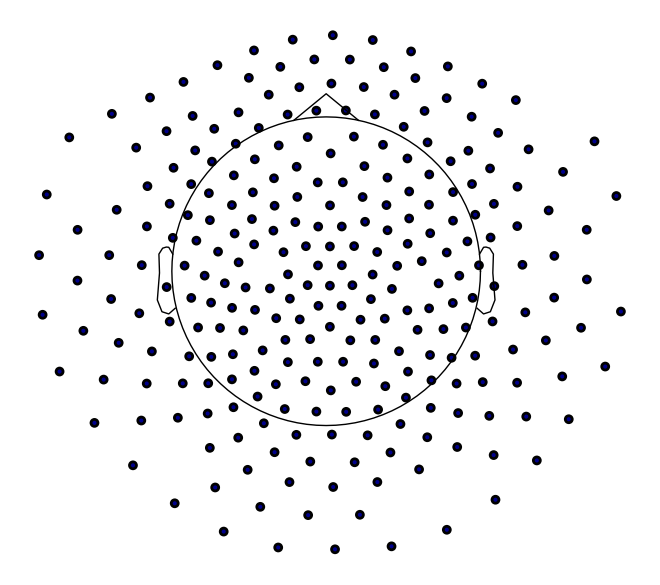

In [57]:
# show position of bad channels (raw.info['bads'])
raw = raw.drop_channels(raw.info['bads'])
raw.plot_sensors(show_names=False)
e=0

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


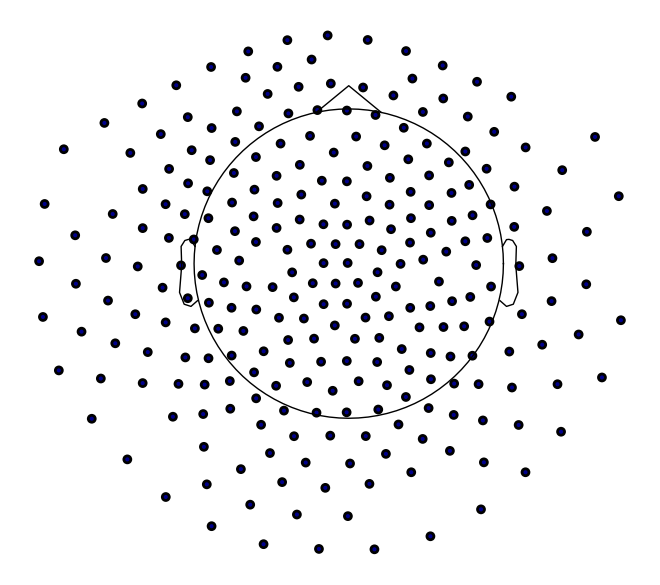

In [66]:
# show position of bad channels (raw.info['bads'])
raw = raw.drop_channels(raw.info['bads'])
raw.plot_sensors(show_names=False)
e=0

In [ ]:
# plot visual evoked response


In [30]:
# find events
raw = raw.resample(100)

In [ ]:
events = mne.find_events(raw, min_duration=0.002, shortest_event=1)

In [36]:
len(events)

1143

In [4]:
dataset_path = "/gpfs2/well/woolrich/projects/disp_csaky/CTF/13703/13703054_Lukas_20230511_reading-f.ds"
raw = mne.io.read_raw_ctf(dataset_path, preload=True)

ds directory : /gpfs2/well/woolrich/projects/disp_csaky/CTF/13703/13703054_Lukas_20230511_reading-f.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -5.92   75.91    0.00 mm <->   -5.92   75.91    0.00 mm (orig :  -51.28   50.50 -269.87 mm) diff =    0.000 mm
       5.92  -75.91    0.00 mm <->    5.92  -75.91    0.00 mm (orig :   48.44  -63.44 -253.52 mm) diff =    0.000 mm
     118.81    0.00    0.00 mm <->  118.81    0.00    0.00 mm (orig :   72.39   55.73 -192.41 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 64 EEG channels from channel info
    64 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /gpfs2/well/woolrich/projects/disp_csaky/CTF/13703/13703054_Lukas_20230511_reading-f.ds/13703054_Lukas_20230511_reading-

In [30]:
ev = mne.events_from_annotations(raw)

Used Annotations descriptions: ['0', '1', '2', '3', '4', '5', '6', 'Btn1', 'Btn2', 'Btn3', 'Btn4', 'Tr0_1', 'Tr0_2', 'Tr0_3', 'Tr0_4', 'Tr0_5', 'Tr0_6', 'Tr0_7', 'Tr1_1', 'Tr1_2', 'Tr1_3', 'Tr1_4']


In [39]:
# keep only events higher than 1
events = ev[0][np.logical_and(ev[0][:, 2] > 1, ev[0][:, 2] < 12)]

In [36]:
ev[1]

{'0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 'Btn1': 8,
 'Btn2': 9,
 'Btn3': 10,
 'Btn4': 11,
 'Tr0_1': 12,
 'Tr0_2': 13,
 'Tr0_3': 14,
 'Tr0_4': 15,
 'Tr0_5': 16,
 'Tr0_6': 17,
 'Tr0_7': 18,
 'Tr1_1': 19,
 'Tr1_2': 20,
 'Tr1_3': 21,
 'Tr1_4': 22}

In [40]:
events[:100]

array([[ 1298,     0,     8],
       [ 3418,     0,     8],
       [ 3609,     0,     5],
       [ 3806,     0,     3],
       [ 3983,     0,     6],
       [ 4163,     0,     2],
       [ 4356,     0,     4],
       [ 4551,     0,     2],
       [ 4724,     0,     5],
       [ 4913,     0,     4],
       [ 5113,     0,     6],
       [ 5285,     0,     3],
       [ 5463,     0,     7],
       [ 5725,     0,     9],
       [ 5815,     0,     4],
       [ 5993,     0,     3],
       [ 6180,     0,     2],
       [ 6368,     0,     5],
       [ 6550,     0,     6],
       [ 6746,     0,     2],
       [ 6948,     0,     3],
       [ 7133,     0,     4],
       [ 7310,     0,     6],
       [ 7483,     0,     5],
       [ 7675,     0,     7],
       [ 7812,     0,    11],
       [ 7890,     0,     8],
       [ 7987,     0,     3],
       [ 8178,     0,     5],
       [ 8360,     0,     4],
       [ 8533,     0,     2],
       [ 8724,     0,     6],
       [ 8922,     0,     5],
       [ 9

In [41]:
accs = []
for i, e in enumerate(events):
    if e[2] > 7 and e[2] < 11:
        if events[i-1][2] == 11:
            acc = (e[2] - 3) == events[i-3][2]
        else:
            acc = (e[2] - 6) == events[i-2][2]
        accs.append(acc)
    

In [42]:
sum(accs) / len(accs)

0.924812030075188

In [12]:
# calculate how many events there are with id-s 2, 3, 4, 5, 6
# (i.e. how many words were presented)
print(np.sum(ev[:, -1] == 2))
print(np.sum(ev[:, -1] == 3))
print(np.sum(ev[:, -1] == 4))
print(np.sum(ev[:, -1] == 5))
print(np.sum(ev[:, -1] == 6))

252
251
251
250
250


In [ ]:
ev[0][:100]

In [ ]:
raw = raw.crop(tmin=100, tmax=120)

In [ ]:
%matplotlib widget
raw.plot(duration=20, n_channels=50)
e=0

In [ ]:
# print channel types
print(raw.get_channel_types())

In [3]:
raw.ch_names

['SCLK01-177',
 'BG1-4123',
 'BG2-4123',
 'BG3-4123',
 'BP1-4123',
 'BP2-4123',
 'BP3-4123',
 'BR1-4123',
 'BR2-4123',
 'BR3-4123',
 'G11-4123',
 'G12-4123',
 'G13-4123',
 'G22-4123',
 'G23-4123',
 'P11-4123',
 'P12-4123',
 'P13-4123',
 'P23-4123',
 'Q11-4123',
 'Q22-4123',
 'Q23-4123',
 'R11-4123',
 'R12-4123',
 'R13-4123',
 'R22-4123',
 'R23-4123',
 'MLC11-4123',
 'MLC12-4123',
 'MLC13-4123',
 'MLC14-4123',
 'MLC15-4123',
 'MLC16-4123',
 'MLC17-4123',
 'MLC21-4123',
 'MLC22-4123',
 'MLC23-4123',
 'MLC24-4123',
 'MLC25-4123',
 'MLC32-4123',
 'MLC41-4123',
 'MLC42-4123',
 'MLC51-4123',
 'MLC52-4123',
 'MLC53-4123',
 'MLC54-4123',
 'MLC55-4123',
 'MLC61-4123',
 'MLC62-4123',
 'MLC63-4123',
 'MLF11-4123',
 'MLF12-4123',
 'MLF13-4123',
 'MLF14-4123',
 'MLF21-4123',
 'MLF22-4123',
 'MLF23-4123',
 'MLF25-4123',
 'MLF31-4123',
 'MLF32-4123',
 'MLF33-4123',
 'MLF34-4123',
 'MLF35-4123',
 'MLF41-4123',
 'MLF42-4123',
 'MLF43-4123',
 'MLF44-4123',
 'MLF45-4123',
 'MLF46-4123',
 'MLF51-4123',
 '

In [4]:
config_text = """
meta:
    event_codes:
        words/hungry: 2
        words/tired: 3
        words/thirsty: 4
        words/toilet: 5
        words/pain: 6
preproc:
  - filter:         {l_freq: 1, h_freq: 25, method: 'iir', iir_params: {order: 5, ftype: butter}}
  - bad_channels:   {picks: 'grad'}
  - bad_segments:   {segment_len: 800, picks: 'grad'}
  - ica_raw:        {picks: 'meg', n_components: 64}
  - ica_autoreject: {picks: 'meg', ecgmethod: 'correlation', measure: 'correlation', threshold: 0.5}
  - find_events:    {min_duration: 0.002}
"""

In [ ]:
raw.ch_names

In [5]:
raw.set_channel_types({'UADC007-4123': 'eog',
                       'UADC008-4123': 'eog',
                       'UADC009-4123': 'ecg',})

<RawCTF | 13703054_Lukas_20230511_reading-f.meg4, 538 x 3512448 (2927.0 s), ~14.08 GB, data loaded>

In [ ]:
osl_outdir = "/gpfs2/well/woolrich/projects/disp_csaky/CTF/13703/preproc25hz/oslpy"
config = yaml.load(config_text, Loader=yaml.FullLoader)
dataset = osl.preprocessing.run_proc_chain(config,
                                           dataset_path,
                                           outdir=osl_outdir,
                                           overwrite=True,
                                           gen_report=True)